In [1]:
# Make module from local packages importable
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [71]:
file_path = "../data/raw/csv/adni_aibl__ad_hc.csv"
df = pd.read_csv(file_path)

In [4]:
df

,health_ad,patient_label,sex,health_emci,health_lmci,health_smc,dataset,health_mci,study_patient_id,healthy,age,study_id,study_image_id,image_label
0,0,002_S_0295,0,0,0,0,train,0,93801557,1,84,0,13721,13721
1,0,002_S_0295,0,0,0,0,train,0,93801557,1,84,0,13722,13722
2,0,002_S_0295,0,0,0,0,train,0,93801557,1,85,0,28560,28560
3,0,002_S_0295,0,0,0,0,train,0,93801557,1,85,0,28561,28561
4,0,002_S_0295,0,0,0,0,train,0,93801557,1,86,0,55275,55275
5,0,002_S_0295,0,0,0,0,train,0,93801557,1,86,0,55276,55276
6,0,002_S_0295,0,0,0,0,train,0,93801557,1,87,0,114209,114209
7,0,002_S_0295,0,0,0,0,train,0,93801557,1,87,0,114210,114210
8,0,002_S_0295,0,0,0,0,train,0,93801557,1,88,0,144446,144446
9,0,002_S_0295,0,0,0,0,train,0,93801557,1,88,0,144447,144447


# Different statistics about the number of images available

In [7]:
# Number of different patients
patient_labels = df.patient_label.unique()
print("Number of patients: {}".format(len(patient_labels)))

Number of patients: 1772


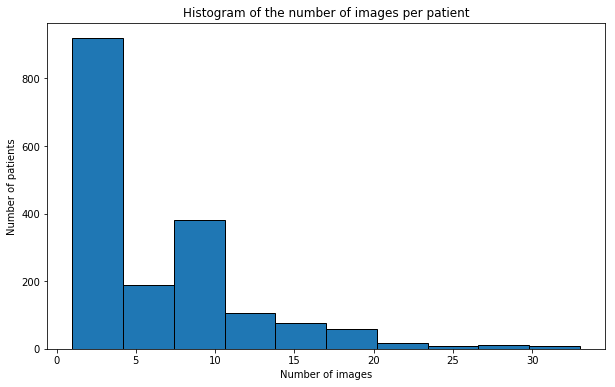

In [33]:
# Histogram of the number of images per patient
patient_count = df.groupby('patient_label').study_image_id.count()
plt.figure(figsize=(10,6))
patient_count.plot.hist(edgecolor='black')
plt.title("Histogram of the number of images per patient")
plt.xlabel("Number of images")
plt.ylabel("Number of patients")
plt.show()

In [29]:
# Patients with at least two images
patient_count = df.groupby('patient_label').study_image_id.count()
patient_count.columns = ['patient_label', "n_images"]

In [30]:
at_least_two = patient_count[patient_count >= 2]

In [31]:
print(patient_count.shape)
print(at_least_two.shape)

(1772,)
(1400,)


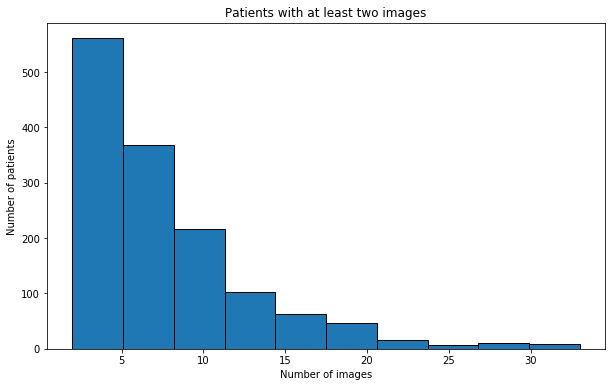

In [34]:
plt.figure(figsize=(10,6))
at_least_two.plot.hist(edgecolor='black')
plt.title("Patients with at least two images")
plt.xlabel("Number of images")
plt.ylabel("Number of patients")
plt.show()

In [50]:
# At least two images with the same age
patient_count_by_age = df.groupby(['patient_label', 'age']).study_image_id.count()

In [51]:
patient_count_by_age = patient_count_by_age.reset_index()
patient_count_by_age = patient_count_by_age.rename({"study_image_id": "n_images"}, axis='columns')
at_least_two = patient_count_by_age[patient_count_by_age.n_images >= 2]
print(patient_count_by_age.shape)
print(at_least_two.shape)

(4420, 3)
(3440, 3)


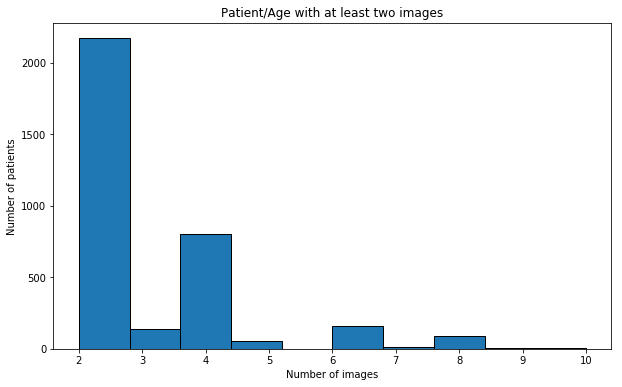

In [55]:
plt.figure(figsize=(10,6))
at_least_two.n_images.plot.hist(edgecolor='black')
plt.title("Patient/Age with at least two images")
plt.xlabel("Number of images")
plt.ylabel("Number of patients")
plt.show()

In [56]:
# Number of patients with at least two images per age
patient_labels = at_least_two.patient_label.unique()
len(patient_labels)

1229

# Diagnosis changes for patients

In [59]:
for r in df.to_dict('records'):
    print(r)

{'health_ad': 0, 'patient_label': '002_S_0295', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 93801557, 'healthy': 1, 'age': 84, 'study_id': 0, 'study_image_id': 13721, 'image_label': '13721'}
{'health_ad': 0, 'patient_label': '002_S_0295', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 93801557, 'healthy': 1, 'age': 84, 'study_id': 0, 'study_image_id': 13722, 'image_label': '13722'}
{'health_ad': 0, 'patient_label': '002_S_0295', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 93801557, 'healthy': 1, 'age': 85, 'study_id': 0, 'study_image_id': 28560, 'image_label': '28560'}
{'health_ad': 0, 'patient_label': '002_S_0295', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 93801557, 'healthy': 1, 'age': 

{'health_ad': 0, 'patient_label': '014_S_4577', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 97289873, 'healthy': 1, 'age': 84, 'study_id': 0, 'study_image_id': 291667, 'image_label': '291667'}
{'health_ad': 0, 'patient_label': '014_S_4577', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 97289873, 'healthy': 1, 'age': 85, 'study_id': 0, 'study_image_id': 313377, 'image_label': '313377'}
{'health_ad': 0, 'patient_label': '014_S_4577', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 97289873, 'healthy': 1, 'age': 85, 'study_id': 0, 'study_image_id': 313383, 'image_label': '313383'}
{'health_ad': 0, 'patient_label': '014_S_4577', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 97289873, 'healthy': 1, '

{'health_ad': 1, 'patient_label': '024_S_1171', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 56816955, 'healthy': 0, 'age': 73, 'study_id': 0, 'study_image_id': 133459, 'image_label': '133459'}
{'health_ad': 1, 'patient_label': '024_S_1171', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 56816955, 'healthy': 0, 'age': 73, 'study_id': 0, 'study_image_id': 133460, 'image_label': '133460'}
{'health_ad': 1, 'patient_label': '024_S_1307', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 75816922, 'healthy': 0, 'age': 75, 'study_id': 0, 'study_image_id': 41527, 'image_label': '41527'}
{'health_ad': 1, 'patient_label': '024_S_1307', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 75816922, 'healthy': 0, 'ag

{'health_ad': 0, 'patient_label': '041_S_5141', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 73067803, 'healthy': 1, 'age': 77, 'study_id': 0, 'study_image_id': 421417, 'image_label': '421417'}
{'health_ad': 0, 'patient_label': '041_S_5141', 'sex': 0, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 73067803, 'healthy': 1, 'age': 77, 'study_id': 0, 'study_image_id': 421423, 'image_label': '421423'}
{'health_ad': 0, 'patient_label': '041_S_5173', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 76067792, 'healthy': 1, 'age': 76, 'study_id': 0, 'study_image_id': 372455, 'image_label': '372455'}
{'health_ad': 0, 'patient_label': '041_S_5173', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 76067792, 'healthy': 1, '

{'health_ad': 0, 'patient_label': '114_S_0416', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 91881532, 'healthy': 1, 'age': 76, 'study_id': 0, 'study_image_id': 152300, 'image_label': '152300'}
{'health_ad': 0, 'patient_label': '114_S_0416', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 91881532, 'healthy': 1, 'age': 78, 'study_id': 0, 'study_image_id': 286895, 'image_label': '286895'}
{'health_ad': 0, 'patient_label': '114_S_0416', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 91881532, 'healthy': 1, 'age': 78, 'study_id': 0, 'study_image_id': 286898, 'image_label': '286898'}
{'health_ad': 0, 'patient_label': '114_S_0416', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 91881532, 'healthy': 1, '

{'health_ad': 1, 'patient_label': '135_S_4657', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 55473942, 'healthy': 0, 'age': 71, 'study_id': 0, 'study_image_id': 297169, 'image_label': '297169'}
{'health_ad': 1, 'patient_label': '135_S_4657', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 55473942, 'healthy': 0, 'age': 71, 'study_id': 0, 'study_image_id': 316060, 'image_label': '316060'}
{'health_ad': 1, 'patient_label': '135_S_4657', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 55473942, 'healthy': 0, 'age': 71, 'study_id': 0, 'study_image_id': 316061, 'image_label': '316061'}
{'health_ad': 1, 'patient_label': '135_S_4657', 'sex': 1, 'health_emci': 0, 'health_lmci': 0, 'health_smc': 0, 'dataset': 'train', 'health_mci': 0, 'study_patient_id': 55473942, 'healthy': 0, '

In [62]:
df.groupby(['patient_label', 'age', 'healthy']).study_image_id.count().reset_index()

,patient_label,age,healthy,study_image_id
0,002_S_0295,84,1,2
1,002_S_0295,85,1,2
2,002_S_0295,86,1,2
3,002_S_0295,87,1,2
4,002_S_0295,88,1,2
5,002_S_0295,89,1,2
6,002_S_0295,90,1,2
7,002_S_0295,91,1,2
8,002_S_0413,76,1,8
9,002_S_0413,77,1,4


In [79]:
df = pd.read_csv(file_path)
records = df.to_dict('records')
# sort by label then by age, then by study_image_id

In [88]:
from operator import itemgetter as i
from functools import cmp_to_key

def cmp(a, b):
    return (a > b) - (a < b) 

def multikeysort(items, columns):
    comparers = [
        ((i(col[1:].strip()), -1) if col.startswith('-') else (i(col.strip()), 1))
        for col in columns
    ]
    def comparer(left, right):
        comparer_iter = (
            cmp(fn(left), fn(right)) * mult
            for fn, mult in comparers
        )
        return next((result for result in comparer_iter if result), 0)
    return sorted(items, key=cmp_to_key(comparer))

records = multikeysort(records, ['patient_label', 'age', 'study_image_id'])

In [90]:
# Find patients for which the diagnosis changes (assuming records are ordered from earliest to latest)
patient_labels = []
hc_to_ad = []
ad_to_hc = []
for i, r in enumerate(records):
    if i == 0:
        continue
        
    last = records[i - 1]
    if (r["patient_label"] == last["patient_label"]) and (r["healthy"] != last["healthy"]):
        patient_labels.append(r["patient_label"])
        if r["healthy"] == 1:
            ad_to_hc.append(r["patient_label"])
        else:
            hc_to_ad.append(r["patient_label"])

In [91]:
print(len(patient_labels))
print(len(set(patient_labels)))

23
23


In [92]:
len(hc_to_ad)

23

In [93]:
len(ad_to_hc)

0

In [94]:
len(records)

11094

In [95]:
hc_to_ad

['002_S_4262',
 '005_S_0223',
 '012_S_5121',
 '021_S_0984',
 '023_S_0061',
 '024_S_0985',
 '029_S_4385',
 '037_S_0467',
 '041_S_0898',
 '041_S_4041',
 '051_S_1123',
 '114_S_0166',
 '123_S_0106',
 '127_S_0112',
 '128_S_0230',
 '129_S_0778',
 '131_S_0123',
 '137_S_0972',
 '28',
 '3',
 '57',
 '740',
 '914']